## Busca Semântica
### Word Embedding com Word2Vec
- Word Embedding ou incorporações de palavras é uma maneira útil de converter texto em um formato interpretável para o modelo, mantendo intacto o significado semântico entre as palavras.

**Nota:** Mais informações sobre Word2Vec [Wikipedia](https://en.wikipedia.org/wiki/Word2vec) e  [Gensim Word2Vec Model](https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92)

### Sobre o dataset
- O dataset sicli_sidratab.csv criado foi construido utilizando:
    - As descrições das tabelas e atributos do SICLI pertinentes ao projeto RTC-13741827 e demanda STE13854982;
    - As descrições das tabelas agregadas contidas no IBGE-SIDRA.
- O dataset sicli_sidra_tab_var.csv contém as informações do dataset anterior mais:
    - As descrições das variáveis agregadas contidas no IBGE-SIDRA.
- Cada uma dessas descrições viraram uma linha nos datasets, os quais possuem somente, a priori, a coluna/atributo DESCRICAO.
- O objetivo desses datasets é o de propiciar, no modelo abaixo descrito, um vocabulário de palavras adequado e inerentes ao contexto SICLI vs IBGE no intuito de relacionar um termo de interesse, por exemplo `renda`, com os termos contidos no dicionário que possuem relação semântica com a palavra `renda`.

In [1]:
# Bibliotecas utilizadas na manipulação do dataset
import pandas as pd
import numpy as np

In [ ]:
# Função que identifica o charset de qualquer dataset.
'''
import chardet
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']    
    return charenc

#encoding_termo = find_encoding('sicli_sidratab.csv')
encoding_termo = find_encoding('sicli_sidra_tab_var.csv')
encoding_termo
'''

In [2]:
# Carregando o dataset em uma estrutura DataFrame do Pandas
# Corpus é um termo utilizado na NLP que exprime uma representação textual

#corpus = pd.read_csv(r'sicli_sidratab.csv', encoding=encoding_termo)

#corpus = pd.read_csv(r'sicli_sidratab.csv', encoding='utf-8')
corpus = pd.read_csv(r'sicli_sidra_tab_var.csv', encoding='utf-8')

In [3]:
# Mostra as cinco primeiras linhas do dataset
termo  = pd.DataFrame(data=corpus,copy=True)
termo.head()

,DESCRICAO
0,Número seqüencial que identifica o agrupamento...
1,(Esta entidade será criada proprietária aqui n...
2,Denominação do agrupamento de tipo de público ...
3,(Esta entidade será criada proprietária aqui n...
4,Indica se um determinado nicho está disponível...


In [ ]:
# retira stopwords 
# conda install -c anaconda nltk
# nltk.download('stopwords')
'''
import nltk
stopwords = nltk.corpus.stopwords.words('portuguese')

def clean_stopwords(text):
    text = str(text)
    text_cleaned = ""
    for word in text.split():
        if word in stopwords:
            pass
        else:
            text_cleaned += " "
            text_cleaned += word

    return text_cleaned

termo.DESCRICAO = clean_stopwords(termo.DESCRICAO)
termo.DESCRICAO.head()
'''

### Tutorial sobre Gensim
- [Gensim](https://radimrehurek.com/gensim/index.html) é uma biblioteca para NLP (Natural Language Process), a qual fornece uma maneira mais fácil de trabalhar com o Word2Vec, dentre outras importantes técnicas para NLP.
 
#### Install gensim

A instalação do gensim é simples:

1. No terminal coloque:

  `pip install --upgrade gensim`
  
**Nota:** Mais informações sobre Gensim no [Wikipedia](https://en.wikipedia.org/wiki/Gensim)

In [4]:
# realiza o pré-processamento dos textos do dataset 
# "quebrando" cada palavra de uma linha em tokens 
from gensim.utils import simple_preprocess

preproc_termo = termo.DESCRICAO.apply(lambda x: simple_preprocess(str(x)))
preproc_termo[:10]

0    [número, seqüencial, que, identifica, agrupame...
1    [esta, entidade, será, criada, proprietária, a...
2    [denominação, do, agrupamento, de, tipo, de, p...
3    [esta, entidade, será, criada, proprietária, a...
4    [indica, se, um, determinado, nicho, está, dis...
5    [esta, entidade, será, criada, proprietária, a...
6    [dia, mês, ano, de, início, da, validade, do, ...
7    [esta, entidade, será, criada, proprietária, a...
8    [dia, mês, ano, do, término, da, validade, do,...
9    [esta, entidade, será, criada, proprietária, a...
Name: DESCRICAO, dtype: object

In [5]:
# Carrega Word2Vec do Gensim
from gensim.models import Word2Vec

''' Treinamento da word2vec sobre o dataset de termos, tendo como resultado um acréscimo de
das palavras/termos de negócio com as do modelo Word2Vec pré-treinado ''' 
w2v_model = Word2Vec(preproc_termo, size=300, min_count=2, sg=1)

In [6]:
# tamanho do vocabulário
print('Tamanho do vocabulário:', len(w2v_model.wv.vocab))

tamanho do vocabulário: 3871


In [7]:
# recupera a palavra 'renda' no w2v treinado
print('Dimensão do termo \'renda\' no vetor:', w2v_model.wv.get_vector('renda').shape)

Dimensão do termo 'renda' no vetor: (300,)


In [8]:
# procura a palavra que mais se assemelha a 'renda'
words_renda = w2v_model.wv.most_similar('renda')
words_renda

[('informal', 0.8874289989471436),
 ('formal', 0.8857548832893372),
 ('subtipos', 0.8522298336029053),
 ('patrimônio', 0.8236279487609863),
 ('comprometimento', 0.8200185894966125),
 ('aquela', 0.8073082566261292),
 ('clienteobs', 0.8032090067863464),
 ('gerado', 0.7888623476028442),
 ('não', 0.7823094129562378),
 ('maneira', 0.7728161215782166)]

In [9]:
# procura o termo que mais se assemelha a 'cliente'
words_cliente = w2v_model.wv.most_similar('cliente')
words_cliente

[('caixa', 0.8728929758071899),
 ('segmentação', 0.8243274688720703),
 ('grc', 0.8232751488685608),
 ('exemplo', 0.7998248338699341),
 ('vários', 0.7932327389717102),
 ('conjunta', 0.7930757999420166),
 ('realiza', 0.7900331616401672),
 ('negócios', 0.7877436876296997),
 ('relacionamenrto', 0.7865472435951233),
 ('pode', 0.7857394814491272)]

In [10]:
# gera uma lista de termos similares
words_taxa = w2v_model.wv.most_similar('taxa')
words_cliente = w2v_model.wv.most_similar('cliente')
words_renda = w2v_model.wv.most_similar('renda')

# combina a lista de termos
words = words_taxa + words_cliente + words_renda

# extrai somente os termos e não a pontuação de similaridade
words = list(map(lambda x: x[0], words))
words

['desocupaçaþo',
 'combinada',
 'composta',
 'subocupaçaþo',
 'subutilizaçaþo',
 'mortalidade',
 'desocupacao',
 'subocupacao',
 'força',
 'escolarizacao',
 'caixa',
 'segmentação',
 'grc',
 'exemplo',
 'vários',
 'conjunta',
 'realiza',
 'negócios',
 'relacionamenrto',
 'pode',
 'informal',
 'formal',
 'subtipos',
 'patrimônio',
 'comprometimento',
 'aquela',
 'clienteobs',
 'gerado',
 'não',
 'maneira']

/home/marcello/anaconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


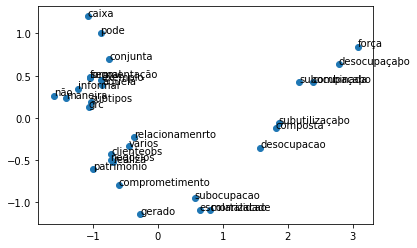

<Figure size 1440x2232 with 0 Axes>

In [12]:
'''# Função que utiliza PCA para reduzir o Corpus em duas dimensões,
# no intuito de plotar no plano carteziano X,Y as distâncias entre
# os termos pesquisados no vocabulário. '''

from matplotlib import pyplot
from sklearn.decomposition import PCA 

# plots w2v embeddings (incoporação) de uma determinada lista de termos
def plot_w2v(word_list):
    X = w2v_model[word_list]
    
    # reduz para 2 dimensões 
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # cria o scatter plot da projeção
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    pyplot.figure(figsize=(20,31))
    pyplot.show()
    
# plot w2v embeddings
plot_w2v(words)

In [13]:
# positive=['renda','cliente','banco']
# negative=['tenha','um','não','sim','nao','dos','se','qual','das','para','da','no']
try:
    result = w2v_model.most_similar(positive=['renda','cliente','banco'], 
                                    negative=['tenha','um','não','sim','nao','dos','se','qual', 
                                             'das','para','da','no'], topn=10)
    for r in result:
        print(r)
except Exception as inst:
    print(inst)

('tipos', -0.23093250393867493)
('dados', -0.2454097867012024)
('receita', -0.2463723123073578)
('produto', -0.28631192445755005)
('indice', -0.2927267849445343)
('uso', -0.293368399143219)
('entidades', -0.2950853109359741)
('produtos', -0.2966740131378174)
('sistema', -0.3059273362159729)
('material', -0.3116729259490967)


/home/marcello/anaconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [15]:
# positive=['cliente', 'taxa', 'receita', 'renda', 'banco']
# negative=['outro', 'feita','adicionado']
try:
    result = w2v_model.most_similar(positive=['cliente', 'taxa', 'receita', 'renda', 'banco'], 
                                    negative=['outro', 'feita','adicionado'], topn=10)
    for r in result:
        print(r)
except Exception as inst:
    print(inst)

('agencia', 0.628463864326477)
('caracterização', 0.6258342862129211)
('classificados', 0.6233385801315308)
('informal', 0.6209497451782227)
('subtipos', 0.6192984580993652)
('afazeres', 0.6154070496559143)
('sazonal', 0.6152575016021729)
('líquida', 0.6152316331863403)
('profissão', 0.6152225136756897)
('liquida', 0.6129709482192993)


/home/marcello/anaconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


In [16]:
# positive=['taxa', 'renda','cliente', 'juros']
# negative=['hora','aquela','um']
try:
    result = w2v_model.most_similar(positive=['taxa', 'renda','cliente', 'juros'], 
                                    negative=['hora','aquela','um'], topn=10)
    for r in result:
        print(r)
except Exception as inst:
    print(inst)

"word 'juros' not in vocabulary"


/home/marcello/anaconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
